<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/Image_Processing_HomeWork/blob/main/HighPass_LowPass_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
#Load Data
from google.colab import files
uploaded= files.upload()

Saving pic2.tif to pic2.tif


In [10]:
#image= cv2.imread('pic4.jpg',0)

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # Used to display Chinese labels normally
plt.rcParams['axes.unicode_minus'] = False # Used to display negative signs normally

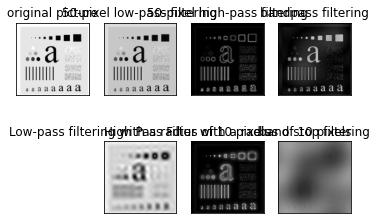

In [15]:

 
 
def salt_pepper(image, salt, pepper):
    """
         Add salt and pepper noise image
         :param image: input image
         :param salt: salt ratio
         :param pepper: pepper ratio
         :return: image with salt and pepper noise added
    """
    height = image.shape[0]
    width = image.shape[1]
    pertotal = salt + pepper #total noise ratio
    noise_image = image.copy()
    noise_num = int(pertotal * height * width)
    for i in range(noise_num):
        rows = np.random.randint(0, height-1)
        cols = np.random.randint(0,width-1)
        if(np.random.randint(0,100)<salt*100):
            noise_image[rows][cols] = 255
        else:
            noise_image[rows][cols] = 0
    return noise_image
 
 
def low_pass_filtering(image, radius):
    """
         Low pass filter function
         :param image: input image
         :param radius: radius
         :return: filtering result
    """
         # Fourier transform the image, fft is a three-dimensional array, fft[:, :, 0] is the real part, fft[:, :, 1] is the imaginary part
    fft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
         # Centralize fft, the generated dshift is still a three-dimensional array
    dshift = np.fft.fftshift(fft)
 
         # Get the center pixel
    rows, cols = image.shape[:2]
    mid_row, mid_col = int(rows / 2), int(cols / 2)
 
         # Build mask, 256 bits, two channels
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[mid_row - radius:mid_row + radius, mid_col - radius:mid_col + radius] = 1
 
         # Multiply the Fourier transform result by a mask
    fft_filtering = dshift * mask
         # Inverse Fourier transform
    ishift = np.fft.ifftshift(fft_filtering)
    image_filtering = cv2.idft(ishift)
    image_filtering = cv2.magnitude(image_filtering[:, :, 0], image_filtering[:, :, 1])
         # Normalize the inverse transform results (generally normalize the last step of image processing, except in special cases)
    cv2.normalize(image_filtering, image_filtering, 0, 1, cv2.NORM_MINMAX)
    return image_filtering
 
 
def high_pass_filtering(image, radius, n):
    """
         High pass filter function
         :param image: input image
         :param radius: radius
         :param n: ButterWorth filter order
         :return: filtering result
    """
         # Fourier transform the image, fft is a three-dimensional array, fft[:, :, 0] is the real part, fft[:, :, 1] is the imaginary part
    fft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
         # Centralize fft, the generated dshift is still a three-dimensional array
    dshift = np.fft.fftshift(fft)
 
         # Get the center pixel
    rows, cols = image.shape[:2]
    mid_row, mid_col = int(rows / 2), int(cols / 2)
 
         # Build ButterWorth high-pass filter mask
 
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(0, rows):
        for j in range(0, cols):
                         # Calculate the distance from (i, j) to the center
            d = math.sqrt(pow(i - mid_row, 2) + pow(j - mid_col, 2))
            try:
                mask[i, j, 0] = mask[i, j, 1] = 1 / (1 + pow(radius / d, 2*n))
            except ZeroDivisionError:
                mask[i, j, 0] = mask[i, j, 1] = 0
         # Multiply the Fourier transform result by a mask
    fft_filtering = dshift * mask
         # Inverse Fourier transform
    ishift = np.fft.ifftshift(fft_filtering)
    image_filtering = cv2.idft(ishift)
    image_filtering = cv2.magnitude(image_filtering[:, :, 0], image_filtering[:, :, 1])
         # Normalize the inverse transform results (generally normalize the last step of image processing, except in special cases)
    cv2.normalize(image_filtering, image_filtering, 0, 1, cv2.NORM_MINMAX)
    return image_filtering
 
 
def bandpass_filter(image, radius, w, n=1):
    """
         Bandpass filter function
         :param image: input image
         :param radius: distance from the center of the band to the origin of the frequency plane
         :param w: bandwidth
         :param n: order
         :return: filtering result
    """
         # Fourier transform the image, fft is a three-dimensional array, fft[:, :, 0] is the real part, fft[:, :, 1] is the imaginary part
    fft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
         # Centralize fft, the generated dshift is still a three-dimensional array
    dshift = np.fft.fftshift(fft)
 
         # Get the center pixel
    rows, cols = image.shape[:2]
    mid_row, mid_col = int(rows / 2), int(cols / 2)
 
         # Build mask, 256 bits, two channels
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(0, rows):
        for j in range(0, cols):
                         # Calculate the distance from (i, j) to the center
            d = math.sqrt(pow(i - mid_row, 2) + pow(j - mid_col, 2))
            if radius - w / 2 < d < radius + w / 2:
                mask[i, j, 0] = mask[i, j, 1] = 1
            else:
                mask[i, j, 0] = mask[i, j, 1] = 0
 
         # Multiply the Fourier transform result by a mask
    fft_filtering = dshift * np.float32(mask)
         # Inverse Fourier transform
    ishift = np.fft.ifftshift(fft_filtering)
    image_filtering = cv2.idft(ishift)
    image_filtering = cv2.magnitude(image_filtering[:, :, 0], image_filtering[:, :, 1])
         # Normalize the inverse transform results (generally normalize the last step of image processing, except in special cases)
    cv2.normalize(image_filtering, image_filtering, 0, 1, cv2.NORM_MINMAX)
    return image_filtering
 
 
def bandstop_filter(image, radius, w, n=1):
    """
         Bandpass filter function
         :param image: input image
         :param radius: distance from the center of the band to the origin of the frequency plane
         :param w: bandwidth
         :param n: order
         :return: filtering result
    """
         # Fourier transform the image, fft is a three-dimensional array, fft[:, :, 0] is the real part, fft[:, :, 1] is the imaginary part
    fft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
         # Centralize fft, the generated dshift is still a three-dimensional array
    dshift = np.fft.fftshift(fft)
 
         # Get the center pixel
    rows, cols = image.shape[:2]
    mid_row, mid_col = int(rows / 2), int(cols / 2)
 
         # Build mask, 256 bits, two channels
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(0, rows):
        for j in range(0, cols):
                         # Calculate the distance from (i, j) to the center
            d = math.sqrt(pow(i - mid_row, 2) + pow(j - mid_col, 2))
            if radius - w / 2 < d < radius + w / 2:
                mask[i, j, 0] = mask[i, j, 1] = 0
            else:
                mask[i, j, 0] = mask[i, j, 1] = 1
 
         # Multiply the Fourier transform result by a mask
    fft_filtering = dshift * np.float32(mask)
         # Inverse Fourier transform
    ishift = np.fft.ifftshift(fft_filtering)
    image_filtering = cv2.idft(ishift)
    image_filtering = cv2.magnitude(image_filtering[:, :, 0], image_filtering[:, :, 1])
         # Normalize the inverse transform results (generally normalize the last step of image processing, except in special cases)
    cv2.normalize(image_filtering, image_filtering, 0, 1, cv2.NORM_MINMAX)
    return image_filtering
 
 
if __name__ == "__main__":
    image = cv2.imread('pic2.tif',0)
    # image_noise = salt_pepper(image, 0.05, 0.05)
    image_low_pass_filtering5 = low_pass_filtering(image, 50)
    image_low_pass_filtering1 = low_pass_filtering(image, 10)
    image_high_pass_filtering5 = high_pass_filtering(image, 50, 1)
    image_high_pass_filtering1 = high_pass_filtering(image, 10, 1)
    image_bandpass_filtering5 = bandpass_filter(image, 30, 56, 1)
    image_bandstop_filtering5 = bandstop_filter(image, 30, 56, 1)
    plt.subplot(241), plt.imshow(image,'gray'), plt.title("original picture"), plt.xticks([]), plt.yticks([])
         # plt.subplot(334), plt.imshow(image_noise,'gray'), plt.title("Image with salt and pepper noise added"), plt.xticks([]), plt.yticks([])
    plt.subplot(242), plt.imshow(image_low_pass_filtering5,'gray'), plt.title("50-pixel low-pass filtering"), plt.xticks([]), plt.yticks([])
    plt.subplot(246), plt.imshow(image_low_pass_filtering1,'gray'), plt.title("Low-pass filtering with a radius of 10 pixels"), plt.xticks([]), plt.yticks([])
    plt.subplot(243), plt.imshow(image_high_pass_filtering5,'gray'), plt.title("50-pixel high-pass filtering"), plt.xticks([]), plt.yticks([])
    plt.subplot(247), plt.imshow(image_high_pass_filtering1,'gray'), plt.title("High Pass Filter with a radius of 10 pixels"), plt.xticks([]), plt.yticks([])
    plt.subplot(244), plt.imshow(image_bandpass_filtering5,'gray'), plt.title("bandpass filtering"), plt.xticks([]), plt.yticks([])
    plt.subplot(248), plt.imshow(image_bandstop_filtering5,'gray'), plt.title("band stop filtering"), plt.xticks([]), plt.yticks([])
    plt.show()
